In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
import io
import requests
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

In [161]:
data = pd.read_csv('churn.csv')
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


1. Построить гистограмму количества звонков в техническую поддержку

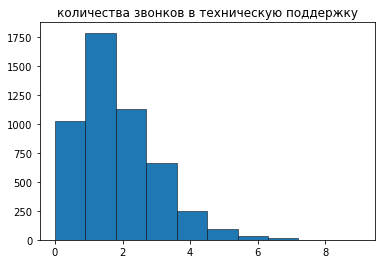

In [162]:
plt.hist(data['number_customer_service_calls'], bins=10, histtype='barstacked',edgecolor='black',linewidth=0.5)
plt.title('количества звонков в техническую поддержку')
plt.show()

2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

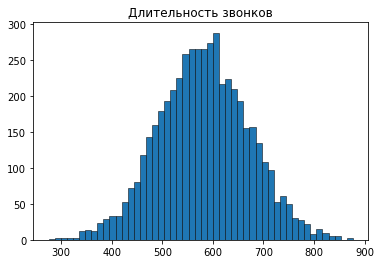

In [163]:
data['total_minutes'] = data['total_night_minutes'] + data['total_intl_minutes'] + data['total_day_minutes'] + data['total_eve_minutes']
plt.hist(total_minutes, bins=50, histtype='barstacked',edgecolor='black',linewidth=0.5) 
plt.title('Длительность звонков')
plt.show()

3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

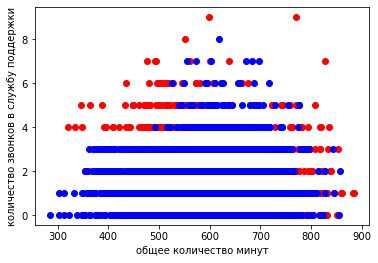

In [286]:
plt.scatter(data[data['churned']==True]['total_minutes'], data[data['churned']==True]['number_customer_service_calls'],color='r')
plt.scatter(data[data['churned']==False]['total_minutes'], data[data['churned']==False]['number_customer_service_calls'], color='b')
plt.xlabel('общее количество минут')
plt.ylabel('количество звонков в службу поддержки')
plt.show()

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [234]:
sortmax = data.sort_values(by='total_minutes', ascending=False) [["state","area_code","phone_number","total_minutes"]]
sortmin = data.sort_values(by='total_minutes', ascending=False) [["state","area_code","phone_number","total_minutes"]]

In [235]:
sortmax.head(5) # top-5 самых много говорящих клиентов

,state,area_code,phone_number,total_minutes
985,NY,415,345-9140,885.0
289,OK,510,352-6976,882.2
3205,MS,408,345-3787,860.2
4991,AZ,510,410-3888,858.2
4271,MO,415,370-4667,857.4


In [237]:
sortmin.tail(5) # top-5 самых мало говорящих клиентов

,state,area_code,phone_number,total_minutes
992,MI,510,375-8934,313.3
1986,WI,415,405-9233,313.0
3779,MN,408,362-8044,303.2
1233,IL,510,380-5246,301.5
648,WI,415,331-3174,284.3


6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [242]:
data['zxc']=1
st = data.groupby(by="state").sum()
st["churn_rate"] = st["churned"]/st["zxc"]*100 
st["avg_day_min"] = st["total_day_charge"]/st["total_day_minutes"]
st[["churn_rate", "avg_day_min"]]

,churn_rate,avg_day_min
state,,
AK,6.944444,0.170002
AL,10.483871,0.170001
AR,17.391304,0.170003
AZ,10.112360,0.170003
CA,26.923077,0.170003
CO,11.458333,0.170003
CT,16.161616,0.170002
DC,10.227273,0.170006
DE,15.957447,0.170004


7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [12]:
pd.get_dummies(data['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [251]:
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'total_minutes', 'zxc'],
      dtype='object')

In [257]:
data_sort = data[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                   'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                   'total_night_minutes', 'total_night_calls', 'total_night_charge',
                   'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                   'number_customer_service_calls']]
data_sort.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [18]:
X, y = data[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                   'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']], data[['churned']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
3375,33,168.4,127,28.63,185.1,106,15.73,220.0,78,9.90,11.0,4,2.97
3891,0,253.9,69,43.16,184.2,138,15.66,174.3,83,7.84,0.4,7,0.11
994,33,251.5,107,42.76,234.1,110,19.90,213.4,87,9.60,10.4,6,2.81
3788,0,245.1,66,41.67,144.6,109,12.29,227.3,112,10.23,3.1,4,0.84
3226,0,264.5,117,44.97,194.0,111,16.49,262.7,111,11.82,7.5,4,2.03


9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas.

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,1.841453,-0.219947,1.359469,-0.219793,-0.312024,0.281353,-0.312876,0.392399,-1.104091,0.392349,0.276273,-0.175554,0.275600
1,-0.578629,1.354121,-1.556149,1.353741,-0.329887,1.895388,-0.329222,-0.510220,-0.852829,-0.511806,-3.565824,1.051905,-3.564257
2,1.841453,1.309937,0.354083,1.310423,0.660570,0.483108,0.660886,0.262043,-0.651820,0.260676,0.058796,0.642752,0.060783
3,-0.578629,1.192112,-1.706957,1.192381,-1.115902,0.432669,-1.116172,0.536581,0.604489,0.537190,-2.587177,-0.175554,-2.584154
4,-0.578629,1.549269,0.856776,1.549756,-0.135369,0.533546,-0.135404,1.235766,0.554236,1.235057,-0.992344,-0.175554,-0.986451


10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [44]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train.values.reshape(-1,))

LogisticRegression()

In [32]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
svc_model=SVC()
svc_model.fit(X_train, y_train.values.reshape(-1,))

SVC()

In [34]:
accuracy_score(y_test, logistic.predict(X_test))

0.856

In [35]:
precision_score(y_test, logistic.predict(X_test))

1.0

In [36]:
recall_score(y_test, logistic.predict(X_test))

0.02702702702702703

In [37]:
f1_score(y_test, logistic.predict(X_test))

0.052631578947368425

In [40]:
accuracy_score(y_test, svc_model.predict(X_test))

0.8952

In [41]:
precision_score(y_test, svc_model.predict(X_test))

0.9655172413793104

In [42]:
recall_score(y_test, svc_model.predict(X_test))

0.3027027027027027

In [43]:
f1_score(y_test, svc_model.predict(X_test))

0.4609053497942387